<a href="https://colab.research.google.com/github/bkim2210/Google_Job_Report/blob/main/Google_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Description of Dataset**
The dataset used in our model is a collection of records from 1250 job at Google/Youtube. The dataset povides the title of the Posistion, where it is located and what kind of qualifications are needed for the position.

### **Prescription of Variables**

1.**Company**-Name of the company

2.**Title**-The title/name of the posistion

3.**Category**-The catergory of the title

4.**Location**-Where the title is located

5.**Responsibilities**-The day to day responsabilites of the title

6.**Minimum Qualifications**- The skills that are needed to at least apply of the title

7.**Preferred Qualifications**-The skills that the employeer would like the top candidate to have for the title.

8.**Minimum_years_experience**- The years of work experaince the candidate possible had in a simillar role.

### **Target Audience**

The target audiance is for anyone interested into getting into filed of Data Analytics and would like to know what they need to be a prime candidate for future employeers.




**Goal of the Project**

Recentaly I comepleted the Google Data Analytics Professional Certificate. The course showed me the tools and the principles that Data Analytics use day to day help solve problems or find key trends to help improve thier business. With me finsihing the course I wanted to see what kind of qualifications employeers' look for into there data analytics posistions by using the  dataset that was provided by Kaggle overviewing the jobs that Google/Youtube has.

In [55]:
# importing the necessary libraries 
import pandas as pd, numpy as np, matplotlib.pyplot as plt,scipy, seaborn as sns
from importlib import reload

plt=reload(plt)

import warnings
warnings.filterwarnings("ignore")

In [56]:
# shows the first 5 rows of the data set
df = pd.read_csv('/job_skills.csv')
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [57]:
df.columns

Index(['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum Qualifications', 'Preferred Qualifications'],
      dtype='object')

Running info() I can see there are some null values in columns Responsibilities, Minimum Qualifications, and Preferred Qualifications. Running pd.isnull(df).sum() give a more specific value to how many null values each column.

In [58]:
# shows the what the data type of each column is and if there any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1235 non-null   object
 5   Minimum Qualifications    1236 non-null   object
 6   Preferred Qualifications  1236 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


***Data Cleaning***

In [59]:
# gets the count of the null values
pd.isnull(df).sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [60]:
# dropping null values
df = df.dropna(how='any',axis='rows')

I ran df.describe() as I wanted to see a short preview of what the top value of each column to give me an idea of what I may see later on.

In [61]:
df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1235,1235,1235,1235,1235,1235,1235
unique,2,779,23,91,801,806,820
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,"Previous internship experience in Sales, Adver..."
freq,1212,35,168,187,33,32,32


Will be mainly foucsing on Google posistion so I dropped any info realting to Youtube.

In [62]:
# gives the count of jobs that are for Google or Youtube.
df.Company.value_counts()
df = df[df.Company != 'YouTube']

In [63]:
# getting the Top 10 values in the Title Column
df.Title.value_counts()[:10]

Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                     9
Recruiter                                      7
User Experience Design Intern, Summer 2018     7
Partner Sales Engineer, Google Cloud           7
Name: Title, dtype: int64

In [64]:
# getting the Top 10 values in the Cateogory Column
df.Category.value_counts()


Sales & Account Management          167
Marketing & Communications          161
Finance                             112
Technical Solutions                 100
Business Strategy                    92
People Operations                    86
User Experience & Design             83
Program Management                   72
Partnerships                         58
Product & Customer Support           48
Legal & Government Relations         43
Administrative                       39
Sales Operations                     31
Software Engineering                 24
Real Estate & Workplace Services     24
Hardware Engineering                 22
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
Technical Writing                     5
IT & Data Management                  5
Developer Relations                   5
Data Center & Network                 2
Name: Category, dtype: int64

In [65]:
# splits the city/state apart from the country
df['Country']=df['Location'].apply(lambda x : x.split(',')[-1])

In [66]:
# Shows the top 10 Countires for Google Jobs
df.Country.value_counts()[:10]


 United States     607
 Ireland            87
 United Kingdom     61
 Germany            53
Singapore           39
 China              38
 Australia          35
 Japan              31
 Taiwan             30
 India              27
Name: Country, dtype: int64

In [67]:
# reanming the columns related to qualfications to have the column without the '_'
df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 'Preferred Qualifications': 'Preferred_Qualifications'})

The following code  helps getting the number the years of the experiance the job has in thier qualifcations. The challenge here was there might be some positions requiring work experience in different field or There might be some positions that don't mention work experience at all.

In [68]:
# Gets the number the years of the experiance the job has in thier qualifcations by splitting from Responsibilities, Minimum_Qualifications, and Preferred_Qualifications
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english')) 

df['Responsibilities'] = df.Responsibilities.apply(lambda x: word_tokenize(x))
df['Responsibilities'] = df.Responsibilities.apply(lambda x: [w for w in x if w not in stop_words])
df['Responsibilities'] = df.Responsibilities.apply(lambda x: ' '.join(x))

df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: word_tokenize(x))
df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: [w for w in x if w not in stop_words])
df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: ' '.join(x))

df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: word_tokenize(x))
df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: [w for w in x if w not in stop_words])
df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: ' '.join(x))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [69]:
# creates the column for Minimum_years_experience
import re
df['Minimum_years_experience'] = df['Minimum_Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))

df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda y : [0] if len(y)==0 else y)

df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda z : max(z))
df['Minimum_years_experience'] = df.Minimum_years_experience.astype(int)

In [70]:
# shows the updated new table
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape , shepherd , ship , show technical progr...",BA/BS degree equivalent practical experience ....,Experience business technology market program ...,Singapore,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities supply chain...,BS degree Engineering discipline equivalent pr...,"BSEE , BSME BSIE degree . Experience using Sta...",China,7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect analyze data draw insight identify str...,"Bachelor ’ degree Business , Economics , Stati...",Experience partnering consulting cross-functio...,United States,2
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one top Android , iOS , web engine...",BA/BS degree Computer Science equivalent pract...,"Experience software developer , architect , te...",United States,0
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements internal customers . Provide...,BA/BS degree equivalent practical experience ....,CTS Certification . Experience construction se...,United States,4


***Exploratory***

In [71]:
# gets certain aggregation measure for Minimum_years_experience
df.Minimum_years_experience.describe()

count    1212.000000
mean        2.842409
std         3.301640
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        15.000000
Name: Minimum_years_experience, dtype: float64

Here I get the degree and the langauge that are needed for requirments. Once exctracted I made a dataframe a bar chart for visualization for both the degree and languages.

In [72]:
# Extract Degrees
Degree = ['BA','BS','Bachelor','MBA','Master','PhD']

Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 890, 'BS': 860, 'Bachelor': 163, 'MBA': 71, 'Master': 80, 'PhD': 8}


In [73]:
# puts Degrees in a dataframe and gets the count
degree_requirement = sorted(Degrees.items(), key=lambda x: x[1], reverse=True)
degree = pd.DataFrame(degree_requirement,columns=['Degree','Count'])
degree['Count'] = degree.Count.astype('int')
degree

,Degree,Count
0,BA,890
1,BS,860
2,Bachelor,163
3,Master,80
4,MBA,71
5,PhD,8


Text(0, 0.5, 'Count')

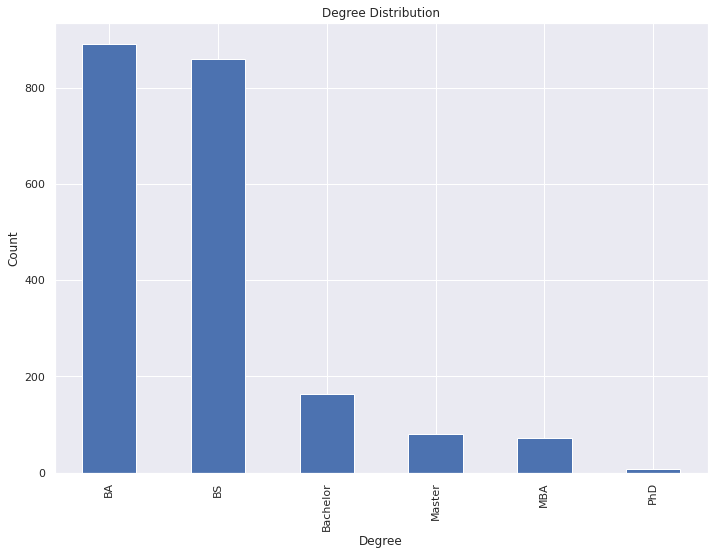

In [74]:
# Degree Bar chart visualization
degree.plot.bar(x='Degree',y='Count',legend=False)

plt.title('Degree Distribution')
plt.ylabel('Count')

In [75]:
# Extracts Langauge 
Programming_Languages = ['Python', 'Java ','C#', 'PHP', 'Javascript', 'Ruby', 'Perl', 'SQL','Go ']

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 96, 'Java ': 71, 'C#': 0, 'PHP': 7, 'Javascript': 3, 'Ruby': 14, 'Perl': 6, 'SQL': 69, 'Go ': 26}


In [76]:
# puts Langauge   in a dataframe and gets the count
languages_requirement = sorted(Languages.items(), key=lambda x: x[1], reverse=True)
language = pd.DataFrame(languages_requirement,columns=['Language','Count'])
language['Count'] = language.Count.astype('int')
language

,Language,Count
0,Python,96
1,Java,71
2,SQL,69
3,Go,26
4,Ruby,14
5,PHP,7
6,Perl,6
7,Javascript,3
8,C#,0


Text(0, 0.5, 'Count')

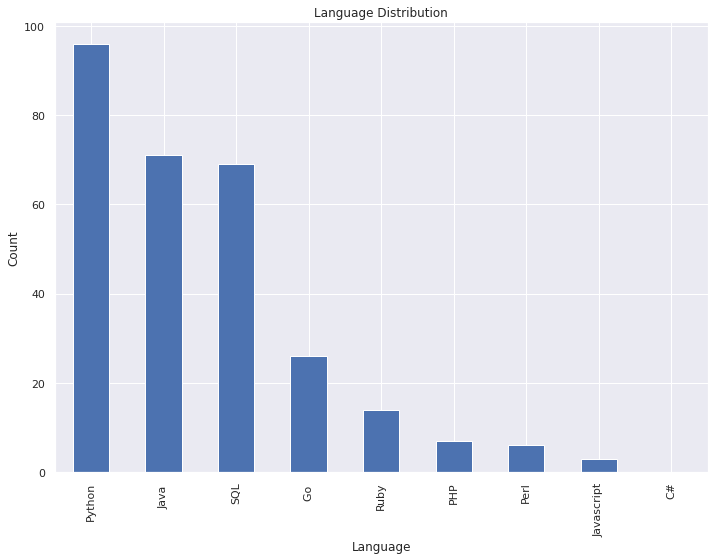

In [77]:
# Langauge Bar chart visualization
language.plot.bar(x='Language',y='Count',legend=False)

plt.title('Language Distribution')
plt.ylabel('Count')

**Minimum work experience**

I wanted to see how minimum work experience varied accross the company. I can see from the graph that many don't have one listed, while it seems majority of the jobs that do have one listed is 5 years. This maybe due to show Google looks for more the type of work experaince you have rather then the number of years.

Text(0.5, 0.98, 'Minimum work experience')

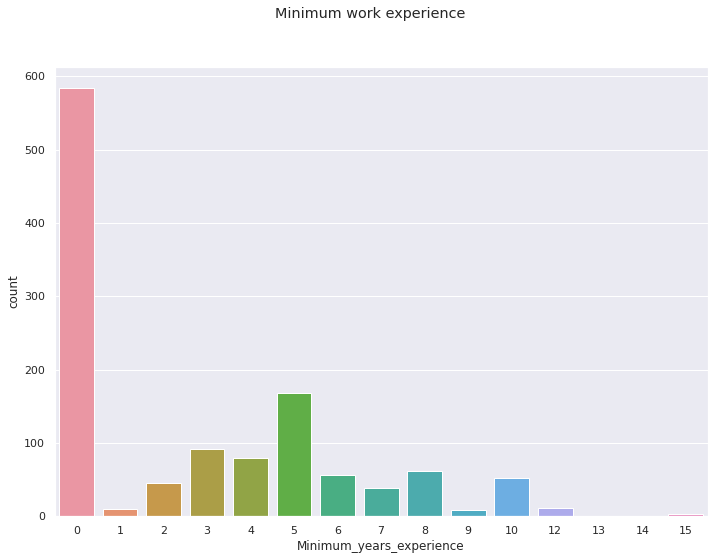

In [78]:
sns.countplot('Minimum_years_experience',data=df)
plt.suptitle('Minimum work experience')

**Exploratory Into Specific Roles**

I wanted to go through more Specific Roles at Google wanted to see what there requirments were. The roles I will be going over are Analyst Based Roles, Developer Based Roles, and Sales Roles.

Analyst Based Roles

In [79]:
# Getting all the Analyst Based Roles into one Data Frame
df_Analyst = df.loc[df.Title.str.contains('Analyst').fillna(False)]

In [80]:
# Outputs Analyst Based Roles' Data Frame
df_Analyst

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect analyze data draw insight identify str...,"Bachelor ’ degree Business , Economics , Stati...",Experience partnering consulting cross-functio...,United States,2
10,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build maintain Support Operations Analytics in...,"BA/BS degree Computer Science , Engineering , ...",Experience designing executing structured anal...,United States,4
20,Google,"Quantitative Analyst, Ads Quality",Product & Customer Support,"Zürich, Switzerland",Apply advanced statistical methods work large ...,"PhD Statistics Econometrics related field , eq...",Relevant industry research experience . Famili...,Switzerland,0
85,Google,"Quantitative Analyst Lead, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Partner cross-functional stakeholders achieve ...,"PhD degree Statistics , Econometrics , related...",Relevant extensive PhD research work experienc...,Switzerland,0
182,Google,"Quantitative Analyst, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Work data sets solve non-routine analytical ch...,Master 's degree quantitative discipline equiv...,PhD quantitative discipline . Experience codin...,Switzerland,0
...,...,...,...,...,...,...,...,...,...
1128,Google,"People Analyst, Reporting and Insights",People Operations,"New York, NY, United States",Build strong relationships collaborate teammat...,"BA/BS degree Economics , Statistics , Finance ...",Experience collaborating projects involving mu...,United States,0
1177,Google,People Operations Business Intelligence Analyst,People Operations,"Mountain View, CA, United States",Maintain internal reporting platforms includin...,"Bachelor 's degree Engineering , Computer Scie...","1 year experience Data Warehousing , Business ...",United States,0
1196,Google,"Analyst, Staffing and Operations",People Operations,"Mountain View, CA, United States","Structure perform analysis independently , con...","BA/BS degree Mathematics , Business Administra...",Experience management consulting business stra...,United States,2
1218,Google,Compensation Analyst,People Operations,"Mountain View, CA, United States",Build robust data models analysis leading comp...,"BA/BS degree Economics , Psychology , Statisti...","Proficiency SQL , R , and/or spreadsheet softw...",United States,3


In [81]:
# Gets all the Resposibilities regarding for Analyst roles
Res_AN = ' '.join(df_Analyst['Responsibilities'].tolist())

In [82]:
# Libraries needed for WordCloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

G = np.array(Image.open('/google-logo-computer-icons-google-logo-png-favpng-L2nAPFg47JP3AjaAdiTk7pfiT.jpg'))

In [83]:
# Function for WordCoud
def MadeWordCloud(title,text):
    df_subset = df.loc[df.Title.str.contains(title).fillna(False)]
    long_text = ' '.join(df_subset[text].tolist())
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    wordcloud = WordCloud(mask=G,background_color="white").generate(long_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(text,size=24)
    plt.show()

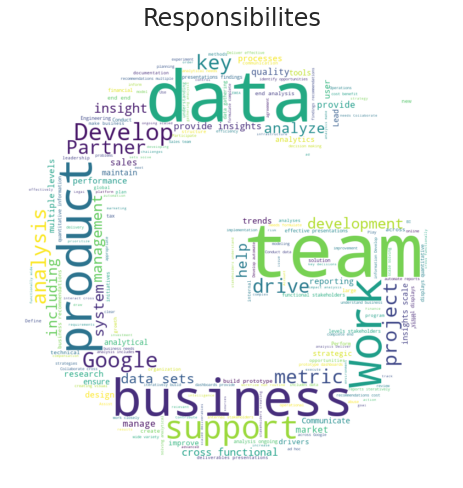

In [84]:
# Outputs the WordCloud
sns.set(rc={'figure.figsize':(11.7,8.27)})
wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()



**Keywords**

**Criteria**: Data/Team/Product/Business/Work

**Insight** : strategic/quality/key/projects/plan/identify/analysis/action/business/infrastructure

**Audience** : sales/operation/stakeholders

**Verb** : maintain/improve/support/model/draw/customize/identify/provide

**Characteristic** : leadership/quantitative/efficiency
To sum up in a sentence :



{' R': 17, 'Python': 13, 'SQL': 27, 'SAS': 12}


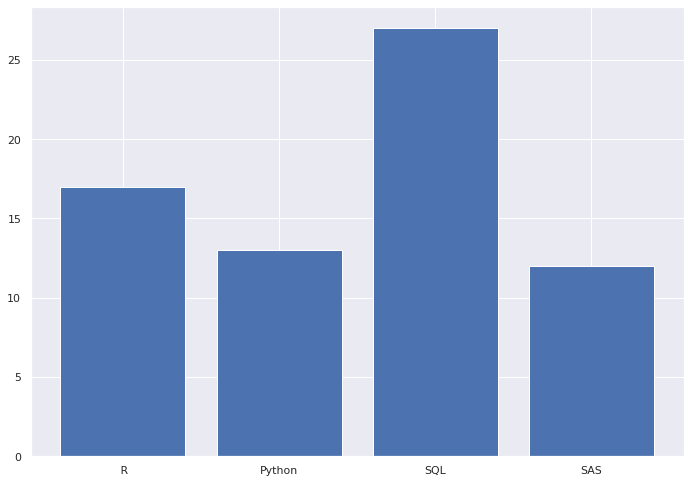

In [85]:
# Outputs a bar chart showing the languges 
DataSkill = [' R','Python','SQL','SAS']

DataSkills = dict((x,0) for x in DataSkill)
for i in DataSkill:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in DataSkill:
        DataSkills[i] = x
print(DataSkills)        
names = list(DataSkills.keys())
values = list(DataSkills.values())
plt.bar(range(len(DataSkills)), values, tick_label=names)
plt.show()


Here we can see R is slightly more preffered languange then Python, but SQL seems to be highly recommend to have as a skill.

{'Tableau': 3, 'Power BI': 0, 'Qlik': 0, 'Data Studio': 1, 'Google Analytics': 1, 'GA': 1}


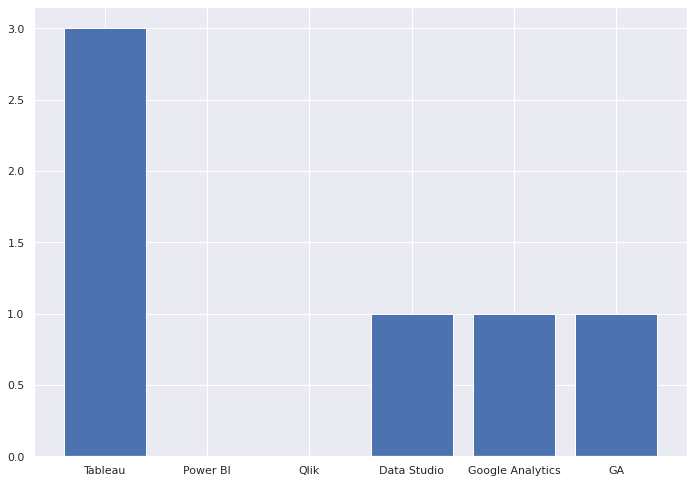

In [86]:
# Outputs a bar chart showing the visualization tools used
DV_Tools = ['Tableau','Power BI','Qlik','Data Studio','Google Analytics','GA']

DV = dict((x,0) for x in DV_Tools)
for i in DV:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in DV_Tools:
        DV[i] = x
        
print(DV)
names = list(DV.keys())
values = list(DV.values())
plt.bar(range(len(DV)), values, tick_label=names)
plt.show()

For visualization tools we can see Tableau comes up the most. Interestingly Power BI is not shown to be used at Google. 

{'SPSS': 1, 'R ': 17, 'Matlab': 0, 'Excel': 0, 'Spreadsheet': 0, 'SAS': 12}


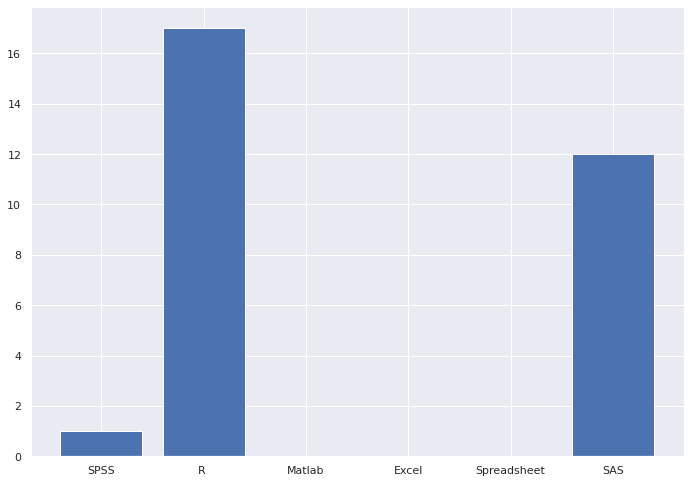

In [87]:
# Outputs a bar chart showing the statistical tools used
SA_Tools = ['SPSS','R ','Matlab','Excel','Spreadsheet','SAS']

SA = dict((x,0) for x in SA_Tools)
for i in SA:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in SA_Tools:
        SA[i] = x
        
print(SA)
names = list(SA.keys())
values = list(SA.values())
plt.bar(range(len(SA)), values, tick_label=names)
plt.show()

Regarding for Statistical tools R comes up more for qualifications.

{'BA': 42, 'BS': 41, 'Bachelor': 6, 'MBA': 0, 'Master': 2, 'PhD': 5}


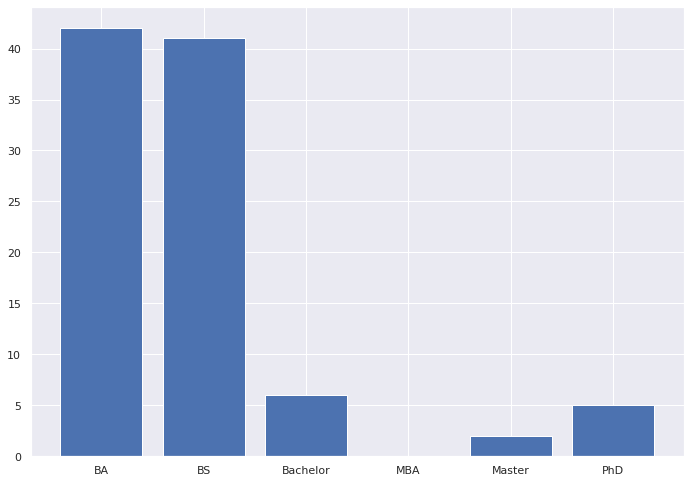

In [88]:
# Outputs a bar chart showing the Minimum_Qualifications for degrees
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)
names = list(Degrees.keys())
values = list(Degrees.values())
plt.bar(range(len(Degrees)), values, tick_label=names)
plt.show()

For Minimum Qualifications to be considered for the role most applicants will need at least a BA or BS degree.

{'BA': 14, 'BS': 5, 'Bachelor': 1, 'MBA': 9, 'Master': 13, 'PhD': 11}


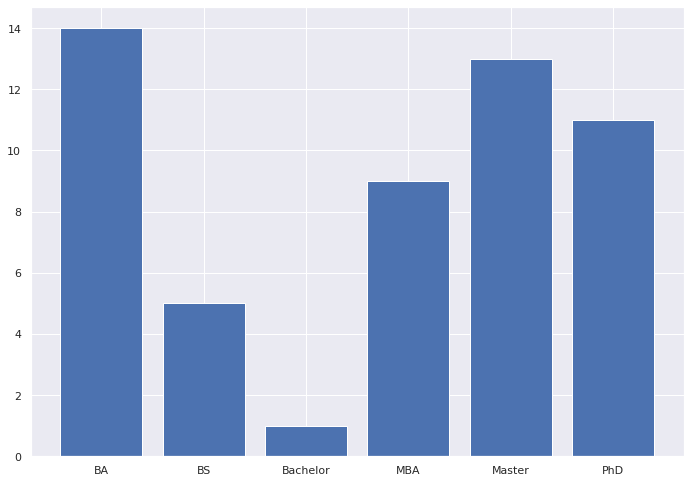

In [89]:
# Outputs a bar chart showing the Preferred Qualifications for degrees
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Analyst['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)
names = list(Degrees.keys())
values = list(Degrees.values())
plt.bar(range(len(Degrees)), values, tick_label=names)
plt.show()

For Preferred Qualifications Google tends to hire applicants with BA or a Master degree.

Text(0.5, 0.98, 'Minimum work experience')

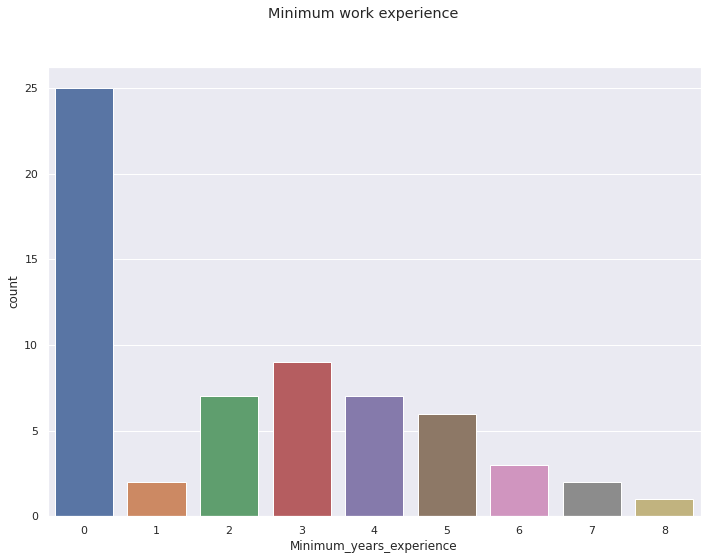

In [90]:
# Outputs bar chart for Minimum work experience
sns.countplot('Minimum_years_experience',data=df_Analyst)
plt.suptitle('Minimum work experience')

For Analyst Based Roles Google it seems most either do not require minimum work experience or not listed, but for most 2-5 years are listed.

In [91]:
# Outputs chart for Countries where Analyst Based Roles are
df_Analyst.Country.value_counts()

 United States     40
 Switzerland        6
 Ireland            5
 United Kingdom     4
 France             1
 India              1
 China              1
Singapore           1
 Japan              1
 Germany            1
 Israel             1
Name: Country, dtype: int64

For Analyst Based Roles the United States has the most jobs at Google.

**Developer Based Roles**


In [92]:
# Getting all the Developer Based Roles into one Data Frame
df_Developer = df.loc[df.Title.str.contains('Developer').fillna(False)]

In [93]:
# Outputs chart for Countries where Developer Based Roles are
df_Developer.Country.value_counts()

 United States     5
 United Kingdom    3
 Ireland           2
 Japan             2
Name: Country, dtype: int64

Just like Analyst Based Roles the United States has the most job at Google, followed by the United Kingdom.

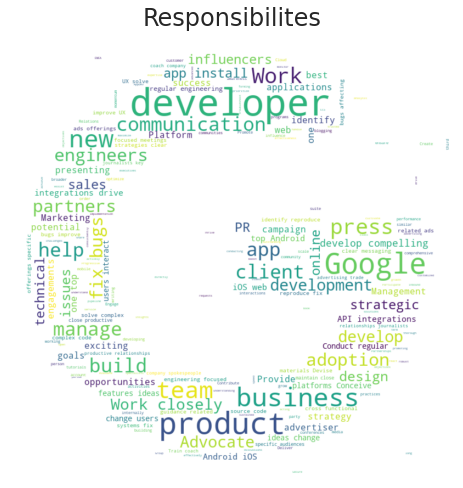

In [94]:
# Outputs WordCloud
Res_AN = ' '.join(df_Developer['Responsibilities'].tolist())
sns.set(rc={'figure.figsize':(11.7,8.27)})
wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()

**Keywords**

Fileds : Business

Skills : Manage/Comunication/Management

Experience : Engineers/Sales/Developer/Android/iOS


{'Java ': 5, 'Javascript': 3, 'Go ': 2, 'Python': 2, 'Kotlin': 3, 'SQL': 0}


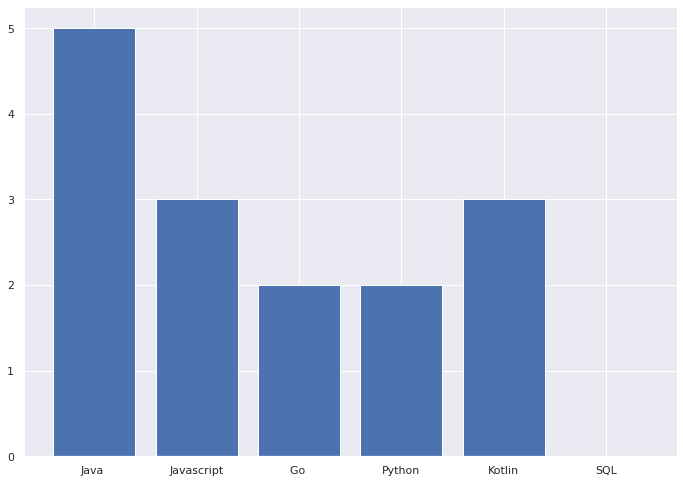

In [95]:
# Outputs a bar chart showing the languges 
DataSkill = ['Java ','Javascript','Go ','Python','Kotlin','SQL']

DataSkills = dict((x,0) for x in DataSkill)
for i in DataSkill:
    x = df_Developer['Minimum_Qualifications'].str.contains(i).sum()
    if i in DataSkill:
        DataSkills[i] = x
        
print(DataSkills)
names = list(DataSkills.keys())
values = list(DataSkills.values())
plt.bar(range(len(DataSkills)), values, tick_label=names)
plt.show()

Unlike Analyst Based Roles SQL is not needed for Developer Roles. Here Java and Javascript are recommend.

{'BA': 1, 'BS': 1, 'Bachelor': 0, 'MBA': 0, 'Master': 1, 'PhD': 0}


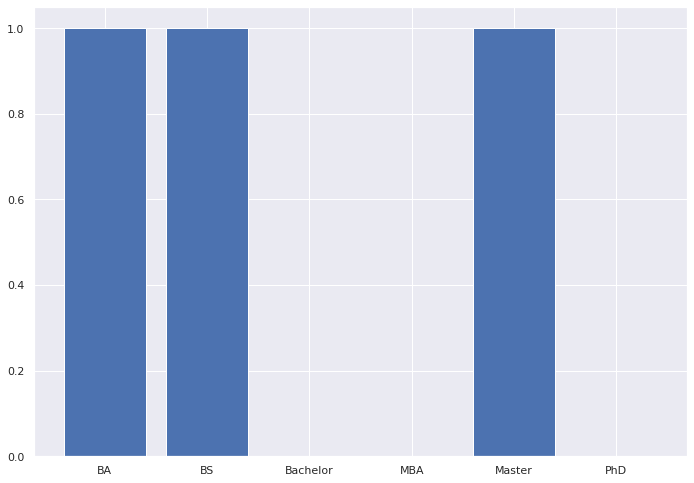

In [96]:
# Outputs a bar chart showing the Preferred Qualifications for degrees
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Developer['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)
names = list(Degrees.keys())
values = list(Degrees.values())
plt.bar(range(len(Degrees)), values, tick_label=names)
plt.show()

The Preferred Qualifications are not listed as munch as only 1 came up for each degree shown in the graph. The degrees are BA, BS, and Master.

Text(0.5, 0.98, 'Minimum work experience')

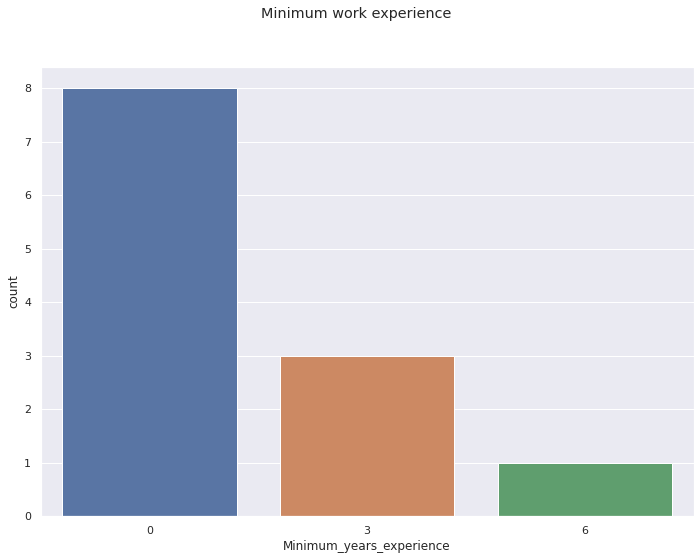

In [97]:
sns.countplot('Minimum_years_experience',data=df_Developer)
plt.suptitle('Minimum work experience')

For years of experience most of them either reqiure 0 experaince or not listed. Google does seem to like at least 3-6 years of experience if listed.

**Sales Roles**


In [98]:
# Getting all the Sales Based Roles into one Data Frame
df_Sales = df.loc[df.Title.str.contains('Sales').fillna(False)]

In [99]:
# Outputs chart for Countries where Sales Based Roles are
df_Sales.Country.value_counts()[:10]

 United States     48
 Ireland           26
 Germany           11
Singapore           7
 Japan              7
 Australia          6
 Canada             3
 United Kingdom     3
 Taiwan             3
 Turkey             2
Name: Country, dtype: int64

Just like Analyst Based Roles the United States has the most job at Google, followed by the Ireland.

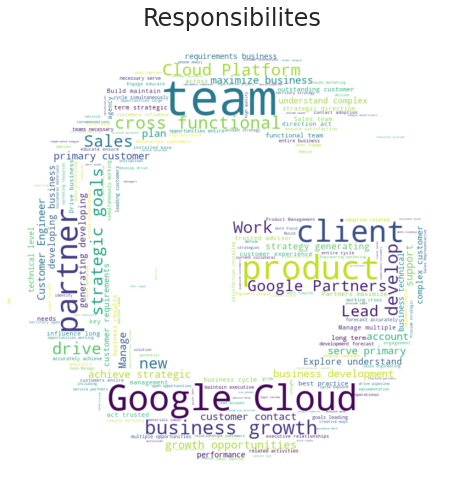

In [100]:
# Outputs WordCloud
Res_AN = ' '.join(df_Sales['Responsibilities'].tolist())
sns.set(rc={'figure.figsize':(11.7,8.27)})
wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()

**Keywords**

Soft skills : Management/Plan

Characteristics : Cross functional/Strategic

Good to be familiar with : Product/Google Cloud Platform/Client/Partner/Develop

{'BA': 104, 'BS': 105, 'Bachelor': 25, 'MBA': 0, 'Master': 1, 'PhD': 1}


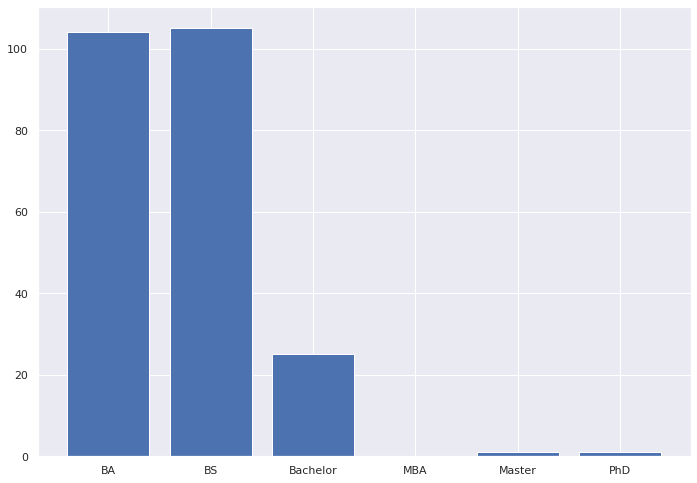

In [101]:
# Outputs a bar chart showing the Minimum Qualifications for degrees
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Sales['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)
names = list(Degrees.keys())
values = list(Degrees.values())
plt.bar(range(len(Degrees)), values, tick_label=names)
plt.show()

For Minimum Qualifications to be considered for the role most applicants will need at least a BA or BS followed Bachelor.

{'BA': 26, 'BS': 2, 'Bachelor': 1, 'MBA': 24, 'Master': 13, 'PhD': 0}


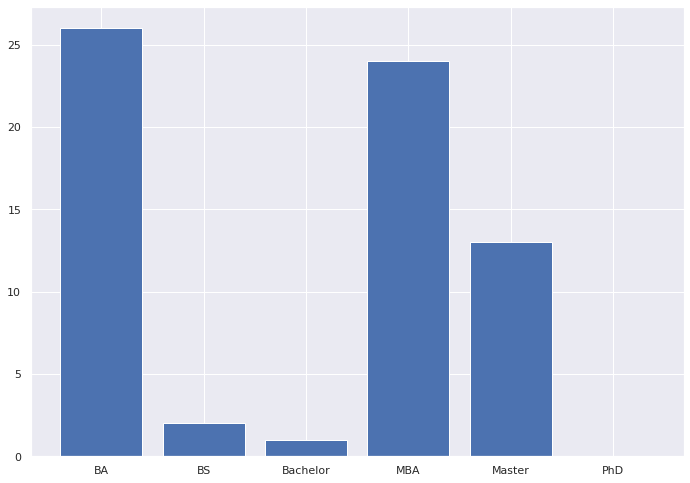

In [102]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Sales['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)
names = list(Degrees.keys())
values = list(Degrees.values())
plt.bar(range(len(Degrees)), values, tick_label=names)
plt.show()

For Preferred Qualifications Google tends to hire applicants with BA or MBA followed by Master.

{'Python': 0, 'Java ': 0, 'C#': 0, 'PHP': 0, 'Javascript': 0, 'Ruby': 0, 'Perl': 0, 'SQL': 6, 'Go ': 0}


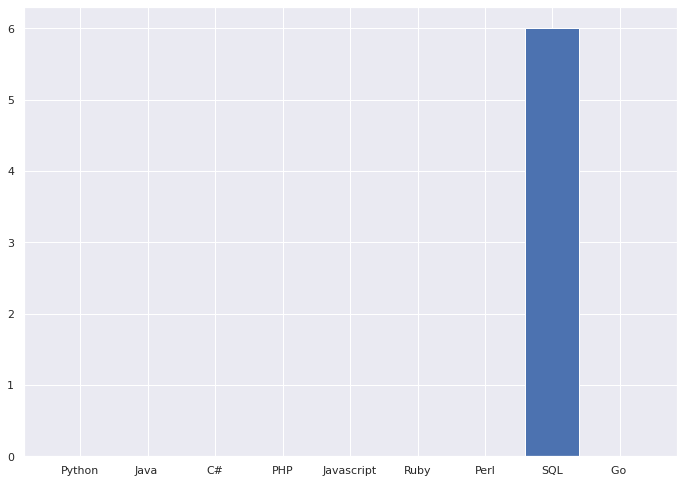

In [103]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_Sales['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)
names = list(Languages.keys())
values = list(Languages.values())
plt.bar(range(len(Languages)), values, tick_label=names)
plt.show()

For Minimum Qualifications SQL comes highly recommend for Sales roles.

{'Python': 2, 'Java ': 2, 'C#': 0, 'PHP': 0, 'Javascript': 0, 'Ruby': 2, 'Perl': 0, 'SQL': 3, 'Go ': 0}


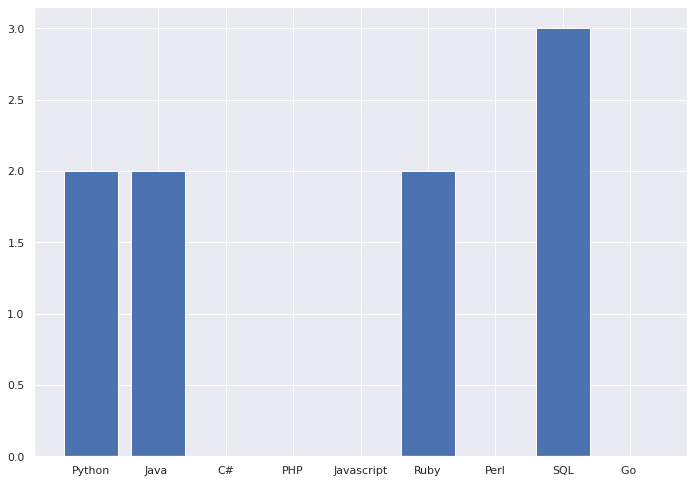

In [104]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_Sales['Preferred_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)
names = list(Languages.keys())
values = list(Languages.values())
plt.bar(range(len(Languages)), values, tick_label=names)
plt.show()

While for Preferred Qualifications the recommend languages are Python, Java, Ruby and SQL.

Text(0.5, 0.98, 'Minimum work experience')

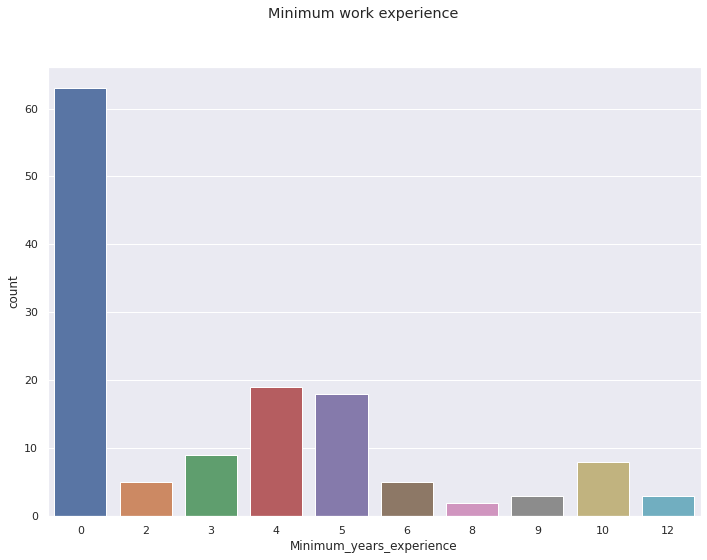

In [105]:
sns.countplot('Minimum_years_experience',data=df_Sales)
plt.suptitle('Minimum work experience')

Still, most of the positions didn't mention work experience required. However, we can see that there are more senior sales positions in Google that requrie more than 5 years experience

**Overall Lesson and Findings**

**1. Application of this EDA**

With str.contains and re.findall, I can extract some keywords and count appearance through the dataset after I browse it roughly by myself

I can easily find some keywords with wordcloud, then dig deeper afterward
This can be used on large data of social network posts or articles
Maybe sentimental analysis.

**2. What I know about Google after the research**

Basically, you need a bachelor or equivalent degree to get in Google, master 
and MBA can earn you a better position among the candidates.

Java and Python are three most important languages in Google, while SQL is also important to analysts and sales.

Knowing business and having good communication, management skills are great characteristic to get a job in Google.

Project management and agile methodologies might be preferred.

Tableau takes the lead of data visualization tools.

The data center in the states requires more experience than other department.